In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

## Swiss Roll

In [94]:
# Generate the Swiss Roll dataset
X, _ = make_swiss_roll(n_samples=3000, random_state=42)

In [54]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [55]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Plot the explained variance ratio
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [56]:
# Reconstruct the dataset using the first two principal components
X_reconstructed = pca.inverse_transform(X_pca)

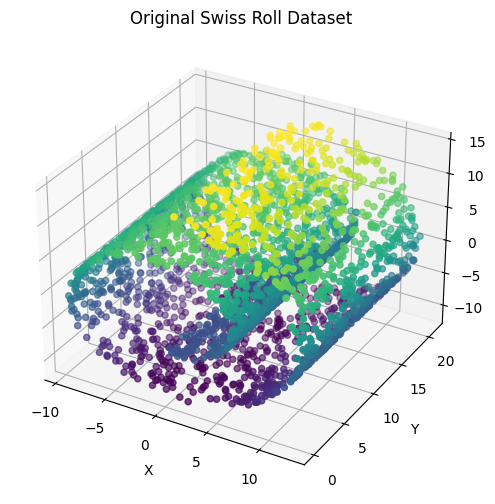

In [95]:
# Plot the original dataset in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original Swiss Roll Dataset')
plt.show()

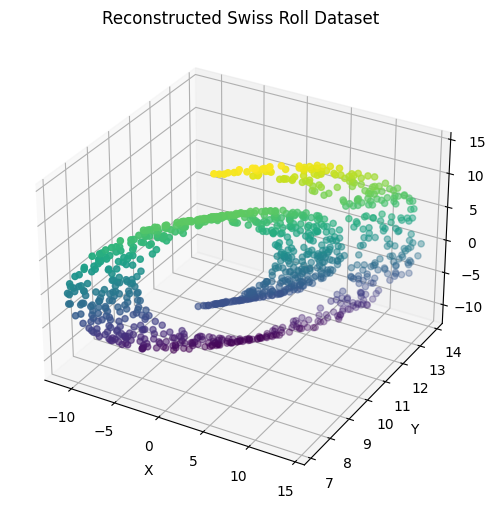

In [58]:
# Plot the PCA-reconstructed dataset in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], X_reconstructed[:, 2], c=X_reconstructed[:, 2], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Reconstructed Swiss Roll Dataset')
plt.show()

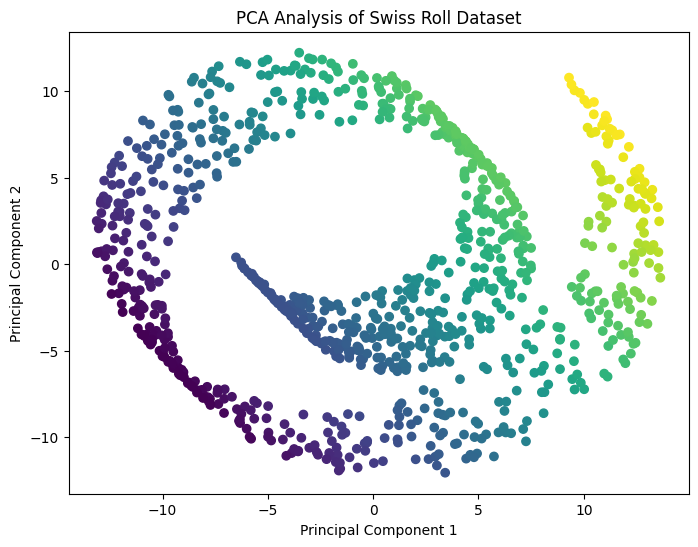

In [59]:
# Plot the PCA projection in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X[:, 2], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Swiss Roll Dataset')
plt.show()

## Word2vec

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors
import gensim.downloader as api

In [68]:
# Download the pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

# Save the model to a binary file
model.save_word2vec_format('word2vec_model.bin', binary=True)

KeyboardInterrupt: 

In [3]:
# Load a subset of the Word2Vec model
start_time = time.time()
model = KeyedVectors.load_word2vec_format('word2vec_model.bin', binary=True, limit=100)
print("Model loaded in %s seconds." % (time.time() - start_time))

Model loaded in 0.01800823211669922 seconds.


In [4]:
# Get the vectors and corresponding words
words = model.index_to_key
vectors = model.vectors

In [9]:
# Perform PCA on the vectors
start_time = time.time()
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)
print("PCA analysis performed in %s seconds." % (time.time() - start_time))

PCA analysis performed in 0.05400419235229492 seconds.


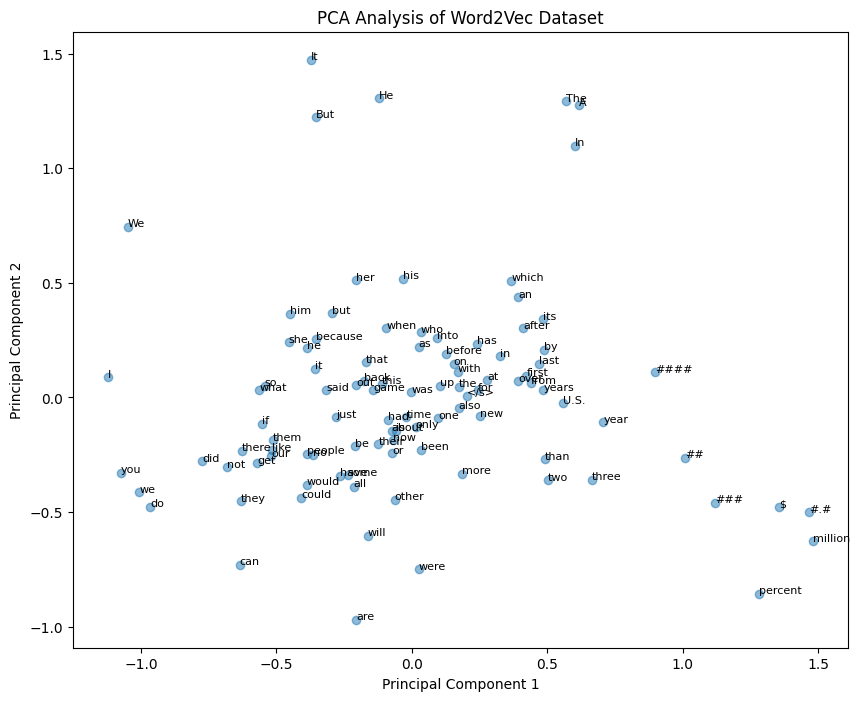

In [8]:
# Plot the PCA projection
plt.figure(figsize=(10, 8))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]), fontsize=8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Word2Vec Dataset')
plt.show()

In [73]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

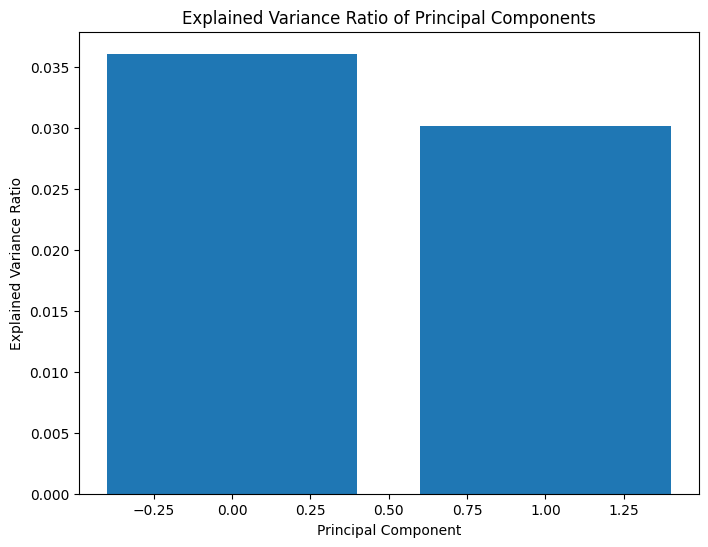

In [74]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

## Cifar10

In [87]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10

In [88]:
# Load CIFAR-10 dataset
start_time = time.time()
(x_train, _), (_, _) = cifar10.load_data()
print("Dataset loaded in %s seconds." % (time.time() - start_time))

170498071/170498071 [==============================] - 258s 2us/step
Dataset loaded in 261.03043246269226 seconds.


In [89]:
# Reshape the dataset
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)

In [90]:
# Select a subset of the dataset
subset_indices = np.random.choice(x_train_reshaped.shape[0], size=5000, replace=False)
subset_data = x_train_reshaped[subset_indices]

In [91]:
# Perform PCA on the subset
start_time = time.time()
pca = PCA(n_components=2)
subset_pca = pca.fit_transform(subset_data)
print("PCA analysis performed in %s seconds." % (time.time() - start_time))

PCA analysis performed in 0.2822864055633545 seconds.


Text(0.5, 1.0, 'PCA Analysis of CIFAR-10 Subset')

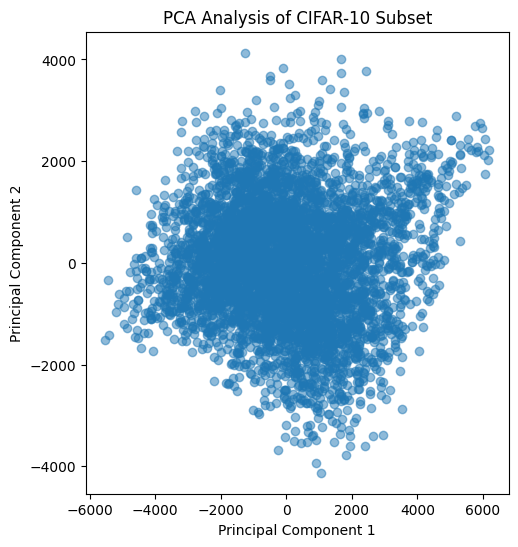

In [92]:
# Plot the PCA projections
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(subset_pca[:, 0], subset_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of CIFAR-10 Subset')

C:\Users\Time_Zephyrus\AppData\Local\Temp\ipykernel_22684\343350139.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i * 4 + j + 1)


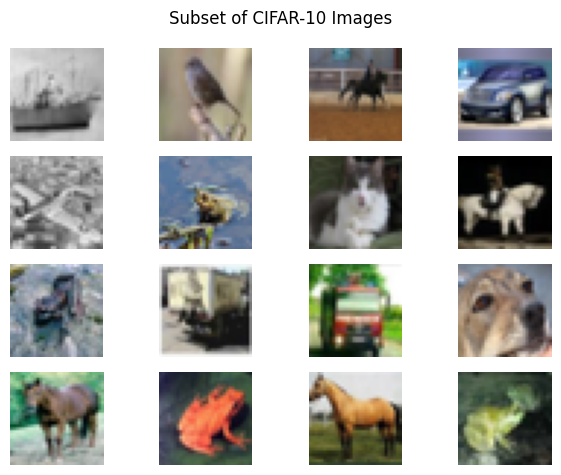

In [93]:
# Plot a subset of images
plt.subplot(1, 2, 2)
indices = np.random.choice(subset_data.shape[0], size=16, replace=False)
images = subset_data[indices].reshape(-1, 32, 32, 3)
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(images[i * 4 + j])
        plt.axis('off')
plt.suptitle('Subset of CIFAR-10 Images')
plt.tight_layout()
plt.show()